In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import env

from datetime import date

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Acquire

##### function that accesses db server and querries logs and cohorts tables from the curriculm_logs db.

In [2]:
#db access
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

#curriculum_logs db
log_sql = "SELECT *\
              FROM logs\
              LEFT JOIN cohorts ON logs.cohort_id = cohorts.id;"

##### grabs dataset from get_connection function above and formats it into a pandas dataframe.

In [3]:
#acquires curriculum_logs dataset
def get_log_data():
    return pd.read_sql(log_sql,get_connection('curriculum_logs'))

##### sets the queried datframe as 'df'.

In [4]:
df = get_log_data()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


##### create a dictionary with the class types to append to the df by 'program id'.

In [5]:
class_type_dict = {'id':[1, 2, 3, 4],
        'Name':['PHP Full Stack Web Development', 
                'Java Full Stack Web Development', 
                'Data Science', 
                'Front End Web Development'],
        'subdomain':['php','java','ds','fe']}
class_type = pd.DataFrame(class_type_dict)
print (class_type)

   id                             Name subdomain
0   1   PHP Full Stack Web Development       php
1   2  Java Full Stack Web Development      java
2   3                     Data Science        ds
3   4        Front End Web Development        fe


##### merges df and class_type datasets

In [6]:
df = df.merge(class_type, how='left', left_on='program_id', right_on='id')

In [7]:
df.head()

,date,time,path,user_id,cohort_id,ip,id_x,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,id_y,Name,subdomain
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,2.0,Java Full Stack Web Development,java


##### caches dataset for accessibility.

In [8]:
df.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/log_data.csv')

# Prepare

##### bring in logs dataframe for prep

In [9]:
df.head()

,date,time,path,user_id,cohort_id,ip,id_x,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,id_y,Name,subdomain
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,1.0,PHP Full Stack Web Development,php
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,2.0,Java Full Stack Web Development,java


In [10]:
df.shape

(900223, 18)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,900223.0,458.825707,249.296767,1.0,269.0,475.0,660.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id_x,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0
id_y,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id_x        847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
 15  id_y        847330 non-null  float64
 16  Name        847330 non-null  object 
 17  subdomain   847330 non-null  object 
dtypes: float64(4), int64(1), object(13)
memory u

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id_x        847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
 15  id_y        847330 non-null  float64
 16  Name        847330 non-null  object 
 17  subdomain   847330 non-null  object 
dtypes: float64(4), int64(1), object(13)
memory u

In [14]:
#splits the path into two colums, I will keep 'path_2' and drop 'path'
df['path_2'] = df.path.str.split('/').str[1]

In [15]:
#Found empty string values in path_2. This code replaces the empty cells with 'NaN'
#in order to drop nulls later.
df['path_2'].replace('', np.nan, inplace=True)

In [16]:
df.path_2.value_counts()

introduction           39053
fundamentals           36294
css-i                  32875
search_index.json      21429
css-ii                 21002
                       ...  
2-inferential-stats        1
submit                     1
53                         1
index.md                   1
units                      1
Name: path_2, Length: 672, dtype: int64

In [17]:
#merge date and time columns
df['date'] = df['date'] +' '+ df['time']#concat time and date

In [18]:
#datetime conversion and set index   
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

In [19]:
#drop columns. these columns have no use.
df = df.drop(columns=['time', 'id_x', 'slack', 'id_y', 'Name', 'deleted_at', 'path'])

In [20]:
#rename columns
df = df.rename(columns = {'name':'cohort', 'start_date':'class_start_date', 'end_date':'class_end_date'})    

In [21]:
df.isnull().sum()

user_id                  0
cohort_id            52893
ip                       0
cohort               52893
class_start_date     52893
class_end_date       52893
created_at           52893
updated_at           52893
program_id           52893
subdomain            52893
path_2              218665
dtype: int64

In [22]:
#drops nulls (rows)
df = df.dropna()

In [23]:
df.isnull().sum()

user_id             0
cohort_id           0
ip                  0
cohort              0
class_start_date    0
class_end_date      0
created_at          0
updated_at          0
program_id          0
subdomain           0
path_2              0
dtype: int64

In [24]:
df.path_2.value_counts()

introduction         37414
fundamentals         34410
css-i                31590
css-ii               20260
search_index.json    19400
                     ...  
email-setup              1
53                       1
submit                   1
jupiter                  1
testing-code.md          1
Name: path_2, Length: 668, dtype: int64

In [25]:
df.shape

(655884, 11)

In [26]:
# take subset where path doesn't end with jpg
df = df[~df.path_2.str.endswith('jpg')]

In [27]:
df.shape

(644696, 11)

In [28]:
# take subset where path doesn't end with jpeg
df = df[~df.path_2.str.endswith('jpeg')]

In [29]:
df.shape

(641264, 11)

In [30]:
# take subset where path doesn't end with svg
df = df[~df.path_2.str.endswith('svg')]

In [31]:
df.shape

(638186, 11)

In [32]:
df.path_2.value_counts()

introduction             37414
fundamentals             34410
css-i                    31590
css-ii                   20260
search_index.json        19400
                         ...  
servelet                     1
1215                         1
exceptions                   1
java-i                       1
control-structures-ii        1
Name: path_2, Length: 645, dtype: int64

In [34]:
df['path_2'] = df.path_2.str.lstrip('(\d)')

In [35]:
df.path_2.value_counts()

introduction            37414
fundamentals            34410
css-i                   31590
css-ii                  20260
search_index.json       19400
                        ...  
environment-setup.md        1
882                         1
jupiter                     1
knn.md                      1
array-lists                 1
Name: path_2, Length: 645, dtype: int64

In [36]:
df.shape

(638186, 11)

In [46]:
df['path_2'] = df.path_2.str.strip('123')

In [47]:
df.shape

(638186, 11)

In [48]:
df.path_2.value_counts()

introduction                               37414
fundamentals                               34410
css-i                                      31590
css-ii                                     20260
search_index.json                          19400
                                           ...  
interview-questions-students                   1
-continuous-probabilistic-methods.ipynb        1
intro-to-data-science.m                        1
interview_questions_instructors                1
index.m                                        1
Name: path_2, Length: 631, dtype: int64

In [51]:
df.shape

(638186, 11)

In [52]:
df['path_2'] = df.path_2.str.lstrip('(-)')

In [53]:
df.shape

(638186, 11)

In [54]:
df.path_2.value_counts()

introduction                37414
fundamentals                34411
css-i                       31590
css-ii                      20260
search_index.json           19400
                            ...  
file-uploa                      1
testing-code.m                  1
inferential-stats               1
introduction:page-source        1
control-structures-ii           1
Name: path_2, Length: 606, dtype: int64

In [55]:
#converts dtypes for listed features
convert_dict_int = {'cohort_id':int, 'program_id':int, 'class_start_date':'datetime64[ns]', 'class_end_date':'datetime64[ns]', 'created_at':'datetime64[ns]', 'updated_at':'datetime64[ns]'}
df = df.astype(convert_dict_int)

In [56]:
df.head()

,user_id,cohort_id,ip,cohort,class_start_date,class_end_date,created_at,updated_at,program_id,subdomain,path_2
date,,,,,,,,,,,
2018-01-26 09:56:05,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,php,object-oriented-programming
2018-01-26 09:56:06,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,php,object_oriented_programming
2018-01-26 09:56:24,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,conditionals
2018-01-26 09:56:41,2,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,loops
2018-01-26 09:56:46,3,22,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,conditionals


In [57]:
df.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/log_clean.csv')

In [58]:
df.user_id.value_counts().head()

11     11703
64     11297
53      8107
314     5829
581     4881
Name: user_id, dtype: int64

In [59]:
df.cohort_id.value_counts().head()

28    55287
33    31656
29    28380
53    27505
62    27083
Name: cohort_id, dtype: int64

In [60]:
df.ip.value_counts().head()

97.105.19.58       208984
97.105.19.61        48388
192.171.117.210      6824
71.150.217.33        4400
67.11.50.23          3501
Name: ip, dtype: int64

In [61]:
df.ip.value_counts(normalize=True).head()

97.105.19.58       0.327466
97.105.19.61       0.075821
192.171.117.210    0.010693
71.150.217.33      0.006895
67.11.50.23        0.005486
Name: ip, dtype: float64

In [62]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [63]:
ip_df = value_counts_and_frequencies(df.ip)
ip_df.head()

,count,proba
97.105.19.58,208984,0.327466
97.105.19.61,48388,0.075821
192.171.117.210,6824,0.010693
71.150.217.33,4400,0.006895
67.11.50.23,3501,0.005486


<AxesSubplot:>

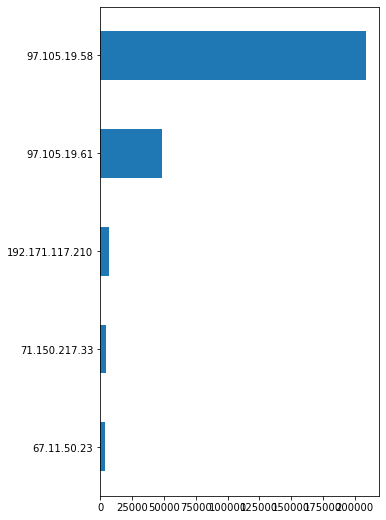

In [64]:
ip_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

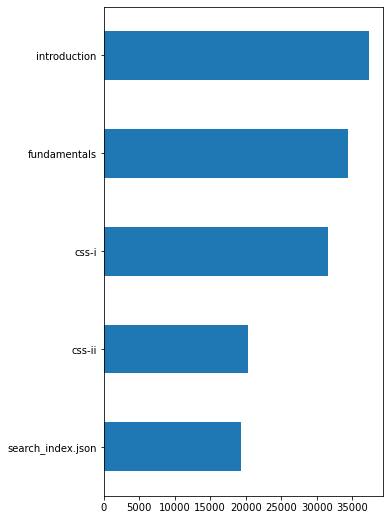

In [69]:
lesson_df = value_counts_and_frequencies(df.path_2)
lesson_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

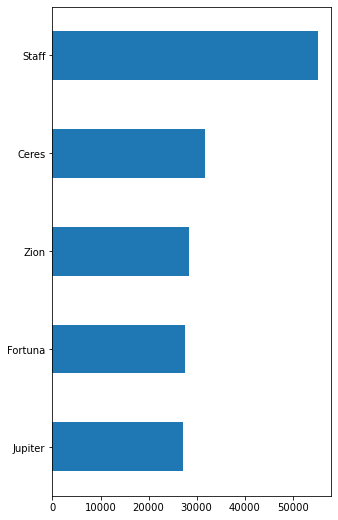

In [70]:
cohort_df = value_counts_and_frequencies(df.cohort)
cohort_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

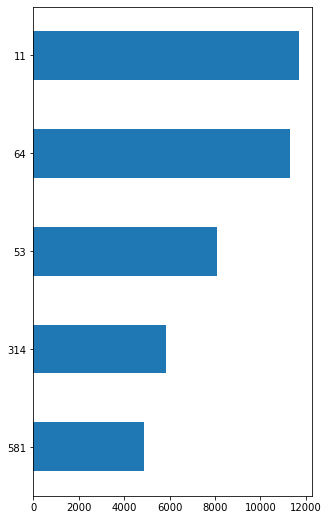

In [72]:
user_df = value_counts_and_frequencies(df.user_id)
user_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

<AxesSubplot:>

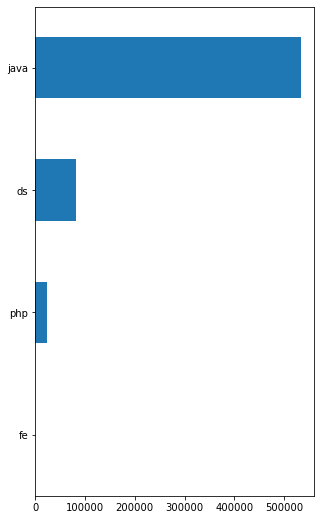

In [74]:
program_df = value_counts_and_frequencies(df.subdomain)
program_df['count'].sort_values().tail().plot.barh(figsize=(5, 9))

# Explore

1. Discrete data is a numerical type of data that includes whole, concrete numbers with specific and fixed data values determined by counting. 
        - disconnected, separate, and distinct
        - to find relationships, trends, and other concepts
        - In many cases, discrete data can be prefixed with “the number of.”
        - whole, round number that can't be broken down into smaller parts.
        - Discrete data includes discrete variables that are finite, numeric, countable, and non-negative integers (5, 10, 15, and so on).
        - can also be categorical - contain a finite number of data values, such as the gender of a person.
        - Discrete data is distributed discretely in terms of time and space.

2. Continuous data includes complex numbers and varying data values that are measured over a specific time interval.-- refers to change over time
        - unspecified number of possible measurements between two realistic points.
        - all about accuracy
        - data sets often carry decimal points
        - The weight of newborn babies
        - The daily wind speed
        - The temperature of a freezer
        - clocking every runner in the Olympics
        - There are infinite possibilities along this line (for example, 5.77 seconds, 5.772 seconds, 5.7699 seconds, etc.), but every new measurement is always somewhere within the range.
        - continuous data can be either numeric or distributed over date and time.
        - changes over time and can have different values at different time intervals.
        - random variables, which may or may not be whole numbers.
        - Regression analysis is one of the most common types of continuous data analysis.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

- which lesson appears the most across cohorts?
- groupby cohort and get a count of lessons (max)...maybe?

In [75]:
lesson_across_cohorts = (df.sort_values('cohort').path_2.value_counts(normalize=True).rename('cohort_count').reset_index())
lesson_across_cohorts.head()

,index,cohort_count
0,introduction,0.058626
1,fundamentals,0.053920
2,css-i,0.049500
3,css-ii,0.031746
4,search_index.json,0.030399


In [80]:
lesson_across_cohorts.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/lesson_across_cohorts.csv')

### Tableau

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- Opposite of the above (min)
_ graph all cohortsand show 

In [76]:
cohorts_to_lesson = (df.sort_values('path_2').cohort.value_counts().rename('path_count').reset_index())
cohorts_to_lesson.head()

,index,path_count
0,Staff,55287
1,Ceres,31656
2,Zion,28380
3,Fortuna,27505
4,Jupiter,27083


In [81]:
cohorts_to_lesson.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/cohorts_to_lesson.csv')

### Tableau

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

- student, active, that do not access the curriculum  (ip address ?)

In [83]:
student_activity = (df.sort_values('ip').user_id.value_counts().rename('ip_count').reset_index())
student_activity.tail()

,index,ip_count
883,401,3
884,169,2
885,177,2
886,212,1
887,348,1


In [84]:
student_activity.to_csv('/Users/hector/codeup-data-science/anomaly-detection-project/student_activity.csv')

### Tableau

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?



In [ ]:
status_given_ip = (
    df.groupby('ip')
    ..value_counts(normalize=True)
    .rename('proba_uid_given_ip')
    .reset_index()
)
status_given_ip.head()

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?



6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [91]:
accessed = (df.sort_values('path_2').user_id.value_counts().rename('p2_count').reindex)
accessed.head()

11     11703
64     11297
53      8107
314     5829
581     4881
Name: p2_count, dtype: int64

In [92]:
extracted = df['class_end_date']
accessed.insert(1, 'end_date', extracted)

AttributeError: 'Series' object has no attribute 'insert'

In [87]:
least_accessed = (df.sort_values('path_2').user_id.value_counts().rename('p2_count').reset_index())
least_accessed .tail()

,index,p2_count
883,401,3
884,169,2
885,177,2
886,212,1
887,348,1


### Same Tableau as number 3

8. Anything else I should be aware of?

In [ ]:
pages = df['ip'].resample('W').count()
pages.head()

In [ ]:
pages.plot()

In [ ]:
# 7 day EMA
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()

In [ ]:
# 14 days EMA
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()

In [ ]:
# 30 days EMA
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()

In [ ]:
# 90 days EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('IP Activity')

plt.show()


# Bollinger Bands and %b

In [ ]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()

In [ ]:
# compute exponential stdev
stdev = pages.ewm(span=span).std()

stdev.head()


In [ ]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub

In [ ]:
lb

In [ ]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

In [ ]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['ip_activity', 'midband', 'ub', 'lb']
my_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.ip_activity, label='IP. Activity')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('IP Activity')

plt.show()

In [ ]:
# get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure


In [ ]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb

In [ ]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub

In [ ]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))

In [ ]:
my_df.tail(3)

In [ ]:
my_df['pct_b'] = (my_df['ip_activity'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()

In [ ]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)
